# Practica: Estadística Inferencial 

## Intervenciones web de psicología positiva

Como parte de tu trabajo en la división de salud mental de la OMS, te han encargado examinar la evidencia disponible acerca de intervenciones web breves para mejorar el bienestar y reducir la depresión. Durante tu revisión, un colega te compartió la siguiente referencia:

>Woodworth, R. J., O'Brien-Malone, A., Diamond, M. R., & Schüz, B. (2018). Data from, ‘Web-based Positive Psychology Interventions: A Reexamination of Effectiveness’. Journal of Open Psychology Data, 6(1), 1. DOI: http://doi.org/10.5334/jopd.35

El estudio en cuestión tiene resultados alentadores. Sin embargo, algo dentro de ti te dice que puede ser demasiado bueno para ser cierto. Decides escuchar tu intuición y revisas los datos para re-hacer el análisis y extraer tus propias conclusiones. 

Primero, cargas los datos y das un vistazo general.

In [ ]:
#!pip install pingouin

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

df = pd.read_csv(
    "https://raw.githubusercontent.com/renatoparedes/IntroPythonInvestigacionPsicologia/master/AnalisisdeDatosCuantitativos/ahi-cesd.csv"
)

In [2]:
df.head()

,id,occasion,elapsed.days,intervention,ahi01,ahi02,ahi03,ahi04,ahi05,ahi06,...,cesd13,cesd14,cesd15,cesd16,cesd17,cesd18,cesd19,cesd20,ahiTotal,cesdTotal
0,1,0,0.000000,4,2,3,2,3,3,2,...,2,3,1,2,1,1,2,2,63,14
1,1,1,11.772731,4,3,3,4,3,3,4,...,1,2,1,3,1,1,1,1,73,6
2,2,0,0.000000,1,3,4,3,4,2,3,...,1,1,1,4,1,1,1,1,73,7
3,2,1,8.017523,1,3,4,4,4,3,3,...,1,1,1,3,1,1,1,1,89,10
4,2,2,14.304086,1,3,4,4,4,3,3,...,3,1,1,1,1,1,1,1,89,13


# Antes y después

La base de datos tiene muchas variables. Para enfocar tu trabajo, decides fijarte únicamente en las siguientes variables:

- `ahiTotal` : Puntaje total del Authentic Happiness Inventory (AHI)
- `cesdTotal` : Puntaje total del Center for Epidemiological Studies Depression (CES-D) scale
- `occasion`: Momento de medición (0:Pretest, 1:Posttest, 2: Seguimiento a la 1era semana, 3: Seguimiento al 1er mes, 4: Seguimiento a los 3 meses, 5: Seguimiento a los 6 meses).
- `intervention`: Intervención recibida (1:Usar fortalezas distintivas, 2:Tres cosas buenas, 3:Visita de gratitud, 4:Registro de recuerdos tempranos -condición de control- )

## A partir de estas variables:

- Genera un DataFrame que solo contenga los datos de Pretest y Posttest.

In [4]:
ba = df[df["occasion"].isin([0, 1])]
ba

,id,occasion,elapsed.days,intervention,ahi01,ahi02,ahi03,ahi04,ahi05,ahi06,...,cesd13,cesd14,cesd15,cesd16,cesd17,cesd18,cesd19,cesd20,ahiTotal,cesdTotal
0,1,0,0.000000,4,2,3,2,3,3,2,...,2,3,1,2,1,1,2,2,63,14
1,1,1,11.772731,4,3,3,4,3,3,4,...,1,2,1,3,1,1,1,1,73,6
2,2,0,0.000000,1,3,4,3,4,2,3,...,1,1,1,4,1,1,1,1,73,7
3,2,1,8.017523,1,3,4,4,4,3,3,...,1,1,1,3,1,1,1,1,89,10
8,3,0,0.000000,4,3,3,2,4,2,3,...,1,2,1,4,1,1,1,1,77,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,292,0,0.000000,4,2,2,2,2,2,4,...,2,2,1,3,2,3,1,4,50,30
988,292,1,9.940718,4,4,3,2,3,3,4,...,2,1,1,4,1,1,1,3,70,6
989,293,0,0.000000,2,2,2,2,2,2,1,...,1,3,1,2,1,2,1,3,47,18
990,294,0,0.000000,3,3,3,2,3,3,3,...,2,2,1,3,1,1,1,1,70,7


- Genera una visualización que permita comparar los puntajes de la escala AHI según las intervenciones y los momentos de medición (pretest y posttest). ¿Observas alguna diferencia potencialmente significativa?

>Sugerencia: utiliza las funciones boxpot o violinplot del paquete seaborn.

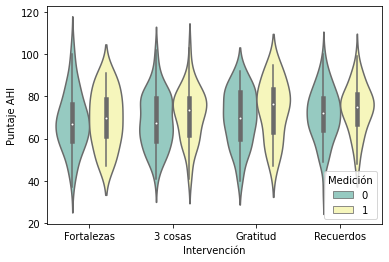

In [5]:
ax1 = sns.violinplot(
    x="intervention",
    y="ahiTotal",
    hue="occasion",
    data=ba,
    palette="Set3",
    scale="width",
)
ax1.set_xlabel("Intervención")
ax1.set_ylabel("Puntaje AHI")
ax1.legend(title="Medición")
intervenciones = ["Fortalezas", "3 cosas", "Gratitud", "Recuerdos"]
ax1.set_xticklabels(intervenciones)
plt.show()

- Genera una visualización que permita comparar los puntajes de la escala CES-D según las intervenciones y los momentos de medición (pretest y posttest). ¿Observas alguna diferencia potencialmente significativa?

>Sugerencia: utiliza las funciones boxpot o violinplot del paquete seaborn.

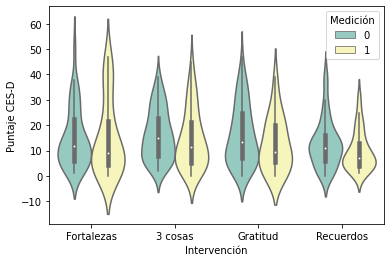

In [6]:
ax1 = sns.violinplot(
    x="intervention",
    y="cesdTotal",
    hue="occasion",
    data=ba,
    palette="Set3",
    scale="width",
)
ax1.set_xlabel("Intervención")
ax1.set_ylabel("Puntaje CES-D")
ax1.legend(title="Medición")
intervenciones = ["Fortalezas", "3 cosas", "Gratitud", "Recuerdos"]
ax1.set_xticklabels(intervenciones);

- Utiliza un ANOVA mixto (1 factor intrasujeto y 1 factor intersujeto) para examinar si existen efectos principales de las intervenciones (`Intervention`) y el momento de medición (`Occasion`) en los puntajes de la escala AHI (`ahiTotal`). ¿Qué puedes concluir?

In [12]:
pg.mixed_anova(
    dv="ahiTotal",
    between="intervention",
    within="occasion",
    subject="id",
    data=ba,
)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,intervention,1122.200184,3,143,374.066728,1.337310,0.264673,0.027290,NaN
1,occasion,707.265306,1,143,707.265306,23.840829,0.000003,0.142896,1.0
2,Interaction,19.477055,3,143,6.492352,0.218847,0.883193,0.004570,NaN


- Utiliza un ANOVA mixto (1 factor intrasujeto y 1 factor intersujeto) para examinar si existen efectos principales de las intervenciones (`Intervention`) y el momento de medición (`Occasion`) en los puntajes de la escala CES-D (`cesdTotal`). ¿Qué puedes concluir?


In [13]:
pg.mixed_anova(
    dv="cesdTotal",
    between="intervention",
    within="occasion",
    subject="id",
    data=ba,
)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,intervention,911.877055,3,143,303.959018,1.495831,0.218264,0.030426,NaN
1,occasion,388.585034,1,143,388.585034,11.842414,0.000759,0.076480,1.0
2,Interaction,69.157327,3,143,23.052442,0.702540,0.552009,0.014525,NaN


# Follow-up

Ahora te propones trabajar con todas los momentos de medición para verificar si existe algún cambio en tus conclusiones preliminares. 

- Genera una visualización que permita comparar los puntajes de la escala AHI según las 4 intervenciones y los 6 momentos de medición. ¿Observas alguna diferencia potencialmente significativa?

>Sugerencia: Utiliza la función `lineplot` del paquete seaborn. 

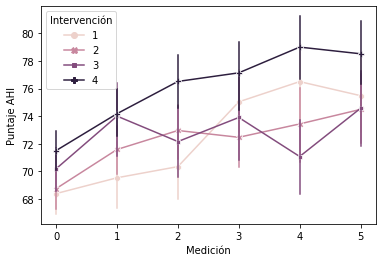

In [11]:
ax1 = sns.lineplot(
    x="occasion",
    y="ahiTotal",
    data=df,
    hue="intervention",
    style="intervention",
    markers=True,
    dashes=False,
    err_style="bars",
    ci=68,
)
ax1.set_xlabel("Medición")
ax1.set_ylabel("Puntaje AHI")
ax1.legend(title="Intervención")
plt.show()

- Genera una visualización que permita comparar los puntajes de la escala CES-D según las 4 intervenciones y los 6 momentos de medición. ¿Observas alguna diferencia potencialmente significativa?

>Sugerencia: Utiliza la función `lineplot` del paquete seaborn. 

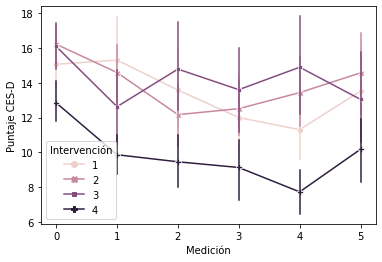

In [16]:
ax1 = sns.lineplot(
    x="occasion",
    y="cesdTotal",
    data=df,
    hue="intervention",
    style="intervention",
    markers=True,
    dashes=False,
    err_style="bars",
    ci=68,
)
ax1.set_xlabel("Medición")
ax1.set_ylabel("Puntaje CES-D")
ax1.legend(title="Intervención")
plt.show()

- Utiliza un ANOVA mixto 4x6 para examinar si existen efectos principales de las intervenciones (Intervention) y el momento de medición (Occasion) en los puntajes de la escala AHI (`ahiTotal`). ¿Qué puedes concluir?


In [14]:
pg.mixed_anova(
    dv="ahiTotal",
    between="intervention",
    within="occasion",
    subject="id",
    data=df,
)

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,intervention,301.636106,3,68,100.545369,0.115111,0.950965,NaN,0.005053,NaN,NaN,NaN,NaN
1,occasion,1078.518519,5,340,215.703704,5.737148,0.000042,0.000231,0.077805,0.746372,False,0.321003,5.475563e-11
2,Interaction,281.254417,15,340,18.750294,0.498708,0.940895,NaN,0.021528,NaN,NaN,NaN,NaN


- De ser pertinente, realiza el cálculo de comparaciones por pares. ¿Qué puedes concluir?

In [17]:
pg.pairwise_ttests(dv="ahiTotal", within="occasion", subject="id", data=df)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,occasion,0,1,True,True,-3.742693,71.0,two-sided,0.000366,62.517,-0.250649
1,occasion,0,2,True,True,-3.307531,71.0,two-sided,0.001479,17.668,-0.262695
2,occasion,0,3,True,True,-2.987538,71.0,two-sided,0.003859,7.514,-0.300128
3,occasion,0,4,True,True,-3.920763,71.0,two-sided,0.000201,108.122,-0.365888
4,occasion,0,5,True,True,-3.682920,71.0,two-sided,0.000446,52.217,-0.340490
5,occasion,1,2,True,True,-0.239957,71.0,two-sided,0.811055,0.133,-0.011061
6,occasion,1,3,True,True,-0.896124,71.0,two-sided,0.373215,0.19,-0.055784
7,occasion,1,4,True,True,-1.777601,71.0,two-sided,0.079752,0.576,-0.128795
8,occasion,1,5,True,True,-1.312224,71.0,two-sided,0.193671,0.294,-0.101602
9,occasion,2,3,True,True,-0.725208,71.0,two-sided,0.470708,0.167,-0.045201


- Utiliza un ANOVA mixto 4x6 para examinar si existen efectos principales de las intervenciones (Intervention) y el momento de medición (Occasion) en los puntajes de la escala CES-D (`cesdTotal`). ¿Qué puedes concluir?

In [15]:
pg.mixed_anova(
    dv="cesdTotal",
    between="intervention",
    within="occasion",
    subject="id",
    data=df,
)

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,intervention,1112.278657,3,68,370.759552,0.588391,0.624697,NaN,0.025302,NaN,NaN,NaN,NaN
1,occasion,517.296296,5,340,103.459259,2.715279,0.020141,0.032619,0.038397,0.730377,False,0.454467,0.000001
2,Interaction,355.478043,15,340,23.698536,0.621966,0.856903,NaN,0.026707,NaN,NaN,NaN,NaN


In [18]:
pg.pairwise_ttests(dv="cesdTotal", within="occasion", subject="id", data=df)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,occasion,0,1,True,True,3.513550,71.0,two-sided,0.000774,31.697,0.244157
1,occasion,0,2,True,True,2.498769,71.0,two-sided,0.014778,2.329,0.190675
2,occasion,0,3,True,True,3.093202,71.0,two-sided,0.002831,9.892,0.274706
3,occasion,0,4,True,True,2.611338,71.0,two-sided,0.010997,3.004,0.246188
4,occasion,0,5,True,True,0.566816,71.0,two-sided,0.572626,0.151,0.056226
5,occasion,1,2,True,True,-0.618205,71.0,two-sided,0.538419,0.156,-0.044121
6,occasion,1,3,True,True,0.471668,71.0,two-sided,0.638610,0.144,0.034630
7,occasion,1,4,True,True,0.032964,71.0,two-sided,0.973796,0.13,0.002520
8,occasion,1,5,True,True,-1.585113,71.0,two-sided,0.117385,0.426,-0.148594
9,occasion,2,3,True,True,1.024916,71.0,two-sided,0.308882,0.214,0.076920
